In [1]:
import pandas as pd

file_data = pd.read_csv("./dataset/file_data.csv")
file_data['가격'] = [5000, 5000, 4000, 5000, 3000]
file_data

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000


In [2]:
df1 = file_data.copy()
df2 = pd.DataFrame({
    '차림표':['비빔밥', '돈까스', '라면', '김밥', '제육덮밥'],
    '가격':[7000, 8000, 3000, 3000, 9000]
})
df2

,차림표,가격
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [3]:
# 병합 - 세로 방향

dfc1 = pd.concat([df1, df2])
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [4]:
# 병합 - 가로 방향

dfc2 = pd.concat([df1, df2], axis=1)
dfc2

,차림표,가격,차림표,가격
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [5]:
columns = ['메뉴1', '가격1', '메뉴2', '가격2']
dfc2.columns = columns
dfc2

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [6]:
sr1 = dfc2['메뉴1']
sr2 = dfc2['가격2']
print(sr1, '\n')
print(sr2)

0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

0    7000
1    8000
2    3000
3    3000
4    9000
Name: 가격2, dtype: int64


In [7]:
# 시리즈 -> 데이터프레임

df = pd.concat([sr1, sr2], axis=1)
df

,메뉴1,가격2
0,냉면,7000
1,칼국수,8000
2,잔치국수,3000
3,수제비,3000
4,우동,9000


In [8]:
# 열 삭제. inplace=True는 원본에 반영함을 의미

dfc3 = dfc2.copy()
# dfc3.drop('가격1', axis=1) # 원본에 삭제 사실이 반영되지는 않음
dfc3.drop(['가격1', '가격2'], axis=1, inplace=True) # 곧바로 원본에 저장
# 두 개 이상의 열을 삭제할 때에는 리스트로 만들어서 입력
dfc3

,메뉴1,메뉴2
0,냉면,비빔밥
1,칼국수,돈까스
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [9]:
# 행 삭제

dfc3.drop([0, 1], axis=0, inplace=True) # axis가 없어도 default로 행이 지워짐
# 역시 여러 줄을 삭제할 때엔 리스트로 입력
dfc3

,메뉴1,메뉴2
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [10]:
dfc3 = dfc2.copy()
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [11]:
# [과제] 인덱싱을 이용하여 특정 컬럼, 특정 행, 특정 값 추출

dfc3[['메뉴1', '메뉴2']]
# dfc3.iloc[[2, 4]]
# dfc3.loc[3, '가격1']

,메뉴1,메뉴2
0,냉면,비빔밥
1,칼국수,돈까스
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [12]:
# 연습문제 - 조건에 맞는 데이터 추출(불린 인덱싱)

dfc3.loc[dfc3['가격1']>4500, ['메뉴1', '가격1']]

,메뉴1,가격1
0,냉면,5000
1,칼국수,5000
3,수제비,5000


In [13]:
# [과제] 행, 열 모두에 조건 지정

dfc3.loc[(dfc3['가격2']>4000) & (dfc3.메뉴2!='돈까스'), ['메뉴2', '가격2']]

,메뉴2,가격2
0,비빔밥,7000
4,제육덮밥,9000


In [14]:
# 행 추가

dfc3.loc[5] = ['김치라면', 4000, '만두', 5000]
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000
5,김치라면,4000,만두,5000


In [15]:
# 열 추가

dfc3['메뉴3'] = dfc3.메뉴2 # 새로운 컬럼 명과 데이터 지정 > 그대로 열로 추가되어 들어감
dfc3

,메뉴1,가격1,메뉴2,가격2,메뉴3
0,냉면,5000,비빔밥,7000,비빔밥
1,칼국수,5000,돈까스,8000,돈까스
2,잔치국수,4000,라면,3000,라면
3,수제비,5000,김밥,3000,김밥
4,우동,3000,제육덮밥,9000,제육덮밥
5,김치라면,4000,만두,5000,만두


In [16]:
# 인덱스 재정렬

ndf = dfc1.reset_index()
ndf.drop('index', axis=1, inplace=True)
ndf

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [17]:
# 인덱스 설정

import numpy as np

ndf.index = np.arange(1, 11)
ndf

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [18]:
# 인덱스 지정한 대로 설정: reindex

new_index = np.arange(1, 15)
ndf = ndf.reindex(new_index, fill_value=0) # 인덱스 값이 없으면 0으로 채운다 / default=NaN
ndf

,차림표,가격
1,냉면,5000
2,칼국수,5000
3,잔치국수,4000
4,수제비,5000
5,우동,3000
6,비빔밥,7000
7,돈까스,8000
8,라면,3000
9,김밥,3000
10,제육덮밥,9000


In [19]:
# 내림차순 정렬
# 오름차순(ascending) 여부 True/False 지정으로 정렬
    
ndf.sort_index(ascending=False)

,차림표,가격
14,0,0
13,0,0
12,0,0
11,0,0
10,제육덮밥,9000
9,김밥,3000
8,라면,3000
7,돈까스,8000
6,비빔밥,7000
5,우동,3000


In [20]:
ndf.sort_values(by=['차림표', '가격']) # 리스트 내의 요소 기준으로 정렬(글자-사전순/숫자-오름차순)
ndf.sort_values(by=['가격'], ascending=False)

,차림표,가격
10,제육덮밥,9000
7,돈까스,8000
6,비빔밥,7000
1,냉면,5000
2,칼국수,5000
4,수제비,5000
3,잔치국수,4000
5,우동,3000
8,라면,3000
9,김밥,3000


In [21]:
import numpy as np

columns = ['Kor', 'Eng', 'Art', 'Math', 'Gym', 'Sci']
index = ['Jim', 'Sam', 'Tom', 'Tim', 'Bob']
data = np.random.randint(70, 101, size=(5, 6))
df = pd.DataFrame(data, index, columns=columns)
df

,Kor,Eng,Art,Math,Gym,Sci
Jim,92,72,71,85,93,74
Sam,88,95,84,73,80,92
Tom,97,75,96,80,99,97
Tim,83,96,82,97,76,92
Bob,79,71,85,79,71,89


[과제] iloc, loc를 이용해서 아래 요구사항들 출력
- df의 Kor 열을 series와 dataframe으로 각각 출력
- df에서 Sam의 Math 점수를 출력(2가지 방법)
- df에서 Tom의 Eng와 Sci 점수를 출력(2가지 방법)
- df에서 Jim, Tim의 Eng, Gym 점수를 출력
- df에서 Jim, Sam의 Art, Math, Gym 점수를 출력

In [22]:
# df의 Kor 열을 series와 dataframe으로 각각 출력

df.loc[:]['Kor'] # series
df.loc[:][['Kor']] # dataframe

,Kor
Jim,92
Sam,88
Tom,97
Tim,83
Bob,79


In [23]:
# df에서 Sam의 Math 점수를 출력(2가지 방법)

df.loc['Sam'][['Math']] # series
df.loc[['Sam']][['Math']] # dataframe

,Math
Sam,73


In [24]:
# df에서 Tom의 Eng와 Sci 점수를 출력(2가지 방법)

df.loc['Tom'][['Eng', 'Sci']] # series
df.loc[['Tom']][['Eng', 'Sci']] # dataframe

,Eng,Sci
Tom,75,97


In [25]:
# df에서 Jim, Tim의 Eng, Gym 점수를 출력

df.loc[['Jim', 'Tim']][['Eng', 'Gym']]

,Eng,Gym
Jim,72,93
Tim,96,76


In [26]:
# df에서 Jim, Sam의 Art, Math, Gym 점수를 출력

df.loc[['Jim', 'Sam']][['Art', 'Math', 'Gym']]

,Art,Math,Gym
Jim,71,85,93
Sam,84,73,80


[과제] iloc, loc를 이용해서 아래 요구사항들을 수행

- df에서 Sam의 Math 점수를 100으로 변경
- df에서 Tom의 Eng와 Math 점수를 100으로 변경
- df에서 Jim, Tim의 Kor, Gym 점수를 null값으로 변경
- df에서 Math와 Gym 점수를 바꾸어 출력

In [27]:
# df에서 Sam의 Math 점수를 100으로 변경

df.loc['Sam']['Math']=100
df

,Kor,Eng,Art,Math,Gym,Sci
Jim,92,72,71,85,93,74
Sam,88,95,84,100,80,92
Tom,97,75,96,80,99,97
Tim,83,96,82,97,76,92
Bob,79,71,85,79,71,89


In [28]:
# df에서 Tom의 Eng와 Math 점수를 100으로 변경

df.loc['Tom']['Eng', 'Math']=100
# df.loc['Tom', ['Eng', 'Math']]=100
df

,Kor,Eng,Art,Math,Gym,Sci
Jim,92,72,71,85,93,74
Sam,88,95,84,100,80,92
Tom,97,100,96,100,99,97
Tim,83,96,82,97,76,92
Bob,79,71,85,79,71,89


In [29]:
# df에서 Jim, Tim의 Kor, Gym 점수를 null값으로 변경

df.loc[['Jim', 'Tim'], ['Kor', 'Gym']] = np.nan
df

,Kor,Eng,Art,Math,Gym,Sci
Jim,NaN,72,71,85,NaN,74
Sam,88.0,95,84,100,80.0,92
Tom,97.0,100,96,100,99.0,97
Tim,NaN,96,82,97,NaN,92
Bob,79.0,71,85,79,71.0,89


In [30]:
# df에서 Math와 Gym 점수를 바꾸어 출력

df

,Kor,Eng,Art,Math,Gym,Sci
Jim,NaN,72,71,85,NaN,74
Sam,88.0,95,84,100,80.0,92
Tom,97.0,100,96,100,99.0,97
Tim,NaN,96,82,97,NaN,92
Bob,79.0,71,85,79,71.0,89


In [31]:
dfc = df.copy()
dfc['tmp']=df.Math
dfc.Math=df.Gym
dfc.Gym=dfc.tmp
dfc=dfc.drop('tmp', axis=1)
dfc

,Kor,Eng,Art,Math,Gym,Sci
Jim,NaN,72,71,NaN,85,74
Sam,88.0,95,84,80.0,100,92
Tom,97.0,100,96,99.0,100,97
Tim,NaN,96,82,NaN,97,92
Bob,79.0,71,85,71.0,79,89


In [32]:
import seaborn as sns

dft = sns.load_dataset('titanic')
dft.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [1]:
# [과제] 데이터 추출(인덱싱, 조건), 변경, 삭제, 정렬, 칼럼 병함(sibsp + parch = family) 등을 수행
# 데이터에서 인사이트 찾기

# 새로운 파일에서 연습

In [34]:
import numpy as np
import pandas as pd

data = np.arange(20).reshape(4, 5)
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [35]:
# 삭제

df1 = df.copy()
# df2 = df1.drop(0)
# df2
df1.drop(df1.index[[0,3]])

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [36]:
# 특정 조건에 맞는 인덱스 구하기

df1 = df.copy()
idx = df1[df1.a > 10].index
df1.drop(idx)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [37]:
li = []
for i in range(100):
    li.append('c'+str(i+1))
print(li)

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100']


In [38]:
data = np.random.randn(10000).reshape(100, 100)
df = pd.DataFrame(data, columns=li)
df['c2'] = df.c2*100
df.iloc[1] = df.iloc[1]*100
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-0.705139,-64.857935,-1.460444,-0.473324,0.115679,0.177224,1.285203,-0.523004,-0.340242,-0.241136,...,1.292823,-0.103990,-0.126662,-1.190689,-0.825088,2.921667,-1.252097,0.389093,-0.837397,0.699842
1,57.202188,-23463.190602,12.219418,-129.920438,-79.810853,-34.171520,73.411156,116.372960,-7.720996,-52.580683,...,65.127917,89.075502,-199.369657,-60.106064,57.518477,-61.603492,59.539596,97.438966,67.285451,-16.206655
2,-0.914722,-120.787527,-0.023497,-0.157737,0.839365,0.865346,-0.460229,-0.775701,-2.495135,1.221098,...,0.544072,0.896884,0.823007,-0.143411,-1.410194,0.129231,-0.434523,0.983668,0.136238,-0.460190
3,-0.707454,-11.426984,1.457351,-0.168867,0.349216,-0.613798,-0.819056,0.172091,-0.856711,-0.619523,...,-0.044733,1.763472,-1.244679,0.018593,-0.856906,-1.436160,-0.701903,0.985612,-0.576246,-0.596453
4,-0.365575,153.774898,-0.315855,-0.356373,0.442365,0.299243,0.332261,-0.606397,-1.292738,-0.311429,...,-0.006244,0.789814,1.050909,1.656210,-0.250504,-1.611545,-0.135026,0.818478,-0.107776,0.950848


In [39]:
df1 = df.copy()
idx = df1[df1.c2>10].index
print(idx)

Int64Index([ 4,  8, 14, 15, 17, 19, 20, 22, 23, 26, 28, 29, 31, 32, 35, 36, 40,
            41, 42, 43, 44, 47, 52, 53, 54, 60, 61, 62, 63, 67, 68, 71, 72, 75,
            77, 78, 79, 82, 84, 86, 87, 88],
           dtype='int64')


In [40]:
df1.drop(idx)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,-0.705139,-64.857935,-1.460444,-0.473324,0.115679,0.177224,1.285203,-0.523004,-0.340242,-0.241136,...,1.292823,-0.103990,-0.126662,-1.190689,-0.825088,2.921667,-1.252097,0.389093,-0.837397,0.699842
1,57.202188,-23463.190602,12.219418,-129.920438,-79.810853,-34.171520,73.411156,116.372960,-7.720996,-52.580683,...,65.127917,89.075502,-199.369657,-60.106064,57.518477,-61.603492,59.539596,97.438966,67.285451,-16.206655
2,-0.914722,-120.787527,-0.023497,-0.157737,0.839365,0.865346,-0.460229,-0.775701,-2.495135,1.221098,...,0.544072,0.896884,0.823007,-0.143411,-1.410194,0.129231,-0.434523,0.983668,0.136238,-0.460190
3,-0.707454,-11.426984,1.457351,-0.168867,0.349216,-0.613798,-0.819056,0.172091,-0.856711,-0.619523,...,-0.044733,1.763472,-1.244679,0.018593,-0.856906,-1.436160,-0.701903,0.985612,-0.576246,-0.596453
5,0.063766,-115.342166,-0.145898,0.036693,-1.364297,-0.801520,1.091873,0.969893,-1.242418,-0.192563,...,2.014108,-0.449949,-0.140824,-1.030687,-0.478462,0.783624,0.916724,-1.220843,-0.649144,0.573309
6,1.637616,-10.173361,0.707629,0.068952,-0.615984,0.113457,-0.100565,0.431477,-0.183671,0.288783,...,-3.412671,-0.623567,0.928378,2.487730,-0.884892,1.007560,0.644745,0.285307,0.226365,0.056088
7,1.635447,-138.109587,0.472990,0.447348,0.724048,0.207665,-0.474120,-0.990515,-0.753474,-1.716654,...,-1.263151,-0.955065,0.716562,-1.455200,0.576104,-0.177230,0.544960,0.006059,-0.741657,-0.982779
9,0.179187,-104.422660,0.212994,1.145398,0.143183,0.370276,-1.049745,-0.620138,-0.421684,0.629406,...,1.426190,-3.040152,1.497629,-1.631423,-1.823733,-2.629277,0.520991,0.599216,-0.066451,-0.167826
10,0.305278,-121.663012,0.204654,0.244063,0.715974,-1.061605,0.476772,-0.099045,-2.611667,-1.495414,...,-0.294661,-0.080727,-0.950204,1.449610,0.043784,-0.985584,-0.458345,-1.716741,1.930653,2.581397
11,2.744205,-26.638528,0.201733,2.406189,0.704651,0.160521,0.143062,0.046167,0.439760,-0.148387,...,0.517939,-2.268061,-0.654261,2.208818,-0.107513,0.506054,0.900925,2.471825,0.715172,-0.287445


In [41]:
df1 = df.copy()
idx = df1.query('c2 > 10')
print(idx)

          c1          c2        c3        c4        c5        c6        c7  \
4  -0.365575  153.774898 -0.315855 -0.356373  0.442365  0.299243  0.332261   
8   0.436531  136.591274  0.350443  0.350826 -0.563876  0.512857  0.674084   
14 -0.539062   65.421550 -0.964756  0.802174 -0.187540  0.537358  0.048626   
15 -0.019834  153.150044  0.468077  0.689533 -0.454622 -1.205231  1.929084   
17  0.653965   83.305595  0.649683 -1.448758  0.147090  1.277603 -0.889254   
19 -0.544039   91.204698  0.673527 -0.865673 -0.388277 -1.502195 -0.315518   
20  0.186542   19.055419  0.636687 -0.321356 -0.340431 -1.101559 -0.812785   
22 -0.234555   55.853506 -1.139383  0.887530  0.499861 -0.290063 -0.614914   
23  0.834401  150.003333 -1.606512 -1.409482 -0.439644 -0.295939 -1.158582   
26  0.665989  149.506309  0.063548 -0.858546  0.020204 -1.540411 -1.117797   
28  0.294702   54.214379 -0.362161 -0.494233  0.702266 -0.523064  0.336502   
29 -0.995004  124.526412 -0.742874 -2.155970 -1.359413  0.572134

In [42]:
df1 = df.copy()
cond1 = df1.c2 > 10
cond2 = df1.c3 > 0
cond3 = df.c4 < 0

# 조건 교집합
df1[cond1 & cond2 & cond3]

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
17,0.653965,83.305595,0.649683,-1.448758,0.147090,1.277603,-0.889254,0.886633,0.439874,0.866693,...,-0.178657,0.983836,1.366145,-0.518943,0.562820,-0.327231,-2.693413,-0.173428,-1.448807,1.415338
19,-0.544039,91.204698,0.673527,-0.865673,-0.388277,-1.502195,-0.315518,0.696708,-0.674068,-1.005637,...,0.154819,0.439742,0.637699,0.416742,-0.223543,-1.263227,-0.759628,-0.820073,-0.239807,-2.023773
20,0.186542,19.055419,0.636687,-0.321356,-0.340431,-1.101559,-0.812785,0.384388,-0.425028,-0.447470,...,0.615144,0.550164,-3.070407,0.372526,-0.921743,0.277448,-0.396944,-0.919171,-0.575954,-0.979074
26,0.665989,149.506309,0.063548,-0.858546,0.020204,-1.540411,-1.117797,-1.292167,0.883411,0.388775,...,0.131959,0.347853,-2.500773,0.407532,0.386676,-0.487309,-0.757040,0.649750,-0.586689,-0.154229
32,-0.398874,95.928666,0.778209,-0.261931,-1.656478,0.184207,-0.003971,-0.608395,0.568427,0.398733,...,-2.142206,0.784307,-1.542490,0.117592,0.737335,0.131153,1.362490,-1.281146,0.697920,-0.753927
52,1.111327,156.099157,0.465330,-0.007734,-0.188405,-0.862170,-0.509339,-0.591986,-0.343791,1.178708,...,-1.837546,-0.442715,1.909896,-0.446454,-1.831872,2.306888,0.747809,0.092473,1.410829,-0.959988
63,-0.516126,37.799838,0.516571,-0.517605,-0.275801,-0.174380,0.184967,-0.927064,0.087366,-0.729502,...,1.819808,0.304816,0.607654,1.210968,-0.437591,-1.393856,1.605301,0.507363,-0.055680,0.881174
71,-1.123818,11.712468,0.718651,-0.000629,2.457159,-0.478431,0.847484,0.947425,0.203431,-0.840836,...,-0.008477,-0.719058,0.038386,-0.926235,1.402895,0.686751,-0.145058,-0.842737,-0.320482,-1.067928
72,-0.873480,317.803257,1.837199,-0.393079,1.350798,-0.524847,0.576639,-0.502749,0.173779,0.742902,...,0.496406,-0.397286,1.717434,-1.191372,-0.755968,0.166490,-0.308378,0.900764,-0.296267,1.333195
75,-1.690073,73.202646,0.759594,-0.311295,-0.294184,-0.692474,1.046261,-0.688492,0.754395,-1.539119,...,-0.443297,-0.532775,-1.940437,0.752391,0.258413,-1.752887,-0.864616,-0.759715,-0.201330,0.356434


In [43]:
# 조건 합집합
df3 = df1[cond1 | cond2 | cond3]
df3.shape

(85, 100)

In [44]:
df1[cond1][['c1', 'c2']].head()

,c1,c2
4,-0.365575,153.774898
8,0.436531,136.591274
14,-0.539062,65.421550
15,-0.019834,153.150044
17,0.653965,83.305595


In [45]:
import seaborn as sns

df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
# 칼럼 이름 변경(딕셔너리 활용)

tdf.rename(columns={'sex':'gender', 'fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
tdf.gender.value_counts()
# tdf.gender.unique()

male      577
female    314
Name: gender, dtype: int64

In [48]:
# 값 변경

df1 = tdf[['gender']].replace(['female', 'male'], [1, 0])
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [49]:
# 칼럼 대문자 변경

tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
# 칼럼 소문자 변경

tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
# 칼럼 순서 변경

columns_customed = ['pclass', 'gender', 'age', 'survived']
tdf[columns_customed].head()

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [52]:
# 결측값(NaN)으로 변경

df1 = df.copy()
df1['sex'] = df1.sex.replace('male', np.nan)
df1.sex.value_counts()

female    314
Name: sex, dtype: int64

In [53]:
tdf.head(2)

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [54]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [55]:
tdf.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [56]:
tdf.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [57]:
tdf.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [58]:
tdf.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [59]:
# 결측값 대체: age 평균값

print(tdf.age.isnull().sum(), '\n')
tdf.age.fillna(tdf.age.mean(), inplace=True) # 결측값 대신 채워넣을 값을 괄호 안에 대입
tdf.age.isnull().sum()

177 



0

In [60]:
tdf1 = df.copy()
tdf1.age.replace(np.nan, tdf1.age.mean(), inplace=True)
tdf1.age.isnull().sum()

0

In [61]:
# 결측값 삭제

tdf2 = df.copy()
tdf2.dropna(subset=['age'], inplace=True)
print(len(tdf2), '\n')
tdf2.age.isnull().sum()

714 



0

In [62]:
tdf[['age', 'ticket']].head()

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [63]:
# 실수를 정수로 변환하여 출력

tdf[['age', 'ticket']].astype('int').head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [64]:
tdf1 = tdf[['age', 'ticket']].astype({'age': 'int', 'ticket':'int'})
tdf1.head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [65]:
# age 칼럼의 값 구성 체크

tdf.age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [66]:
# age 칼럼의 고유 구성 요소

tdf.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [67]:
# age 칼럼의 범주화

def get_category(age):
    cat = ''
    if age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=19: cat='Teenager'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
    return cat

tdf['age_cat']=tdf.age.apply(lambda x:get_category(x)) # apply > 함수를 매핑
tdf[['age', 'age_cat']].head()

,age,age_cat
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [68]:
# 인코딩

tdf = df.copy()
df1 = tdf[['sex', 'class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [69]:
df1.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [70]:
!pip install scikit-learn

In [71]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['sex', 'class']
for feature in features:
    df1[feature]=le.fit_transform(df1[feature])
df1.head()

,sex,class
0,1,2
1,0,0
2,0,2
3,0,0
4,1,2


In [72]:
# 인코딩: 문자를 숫자로 변환

tdf = df.copy()
df1 = tdf[['sex', 'class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [73]:
from sklearn.preprocessing import OneHotEncoder

# 원환 인코딩의 기본 세팅 요소

items = list(df1.sex)
# print(items)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1, 1)
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(oh_labels.toarray(), oh_labels.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [74]:
pd.get_dummies(df1).head()

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [75]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [76]:
df_org = pd.DataFrame(boston.data, columns=[boston.feature_names])
df_org['target']=boston.target
df_org.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
df = df_org[['INDUS', 'RM', "PTRATIO", "LSTAT", 'target']]
df

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2
...,...,...,...,...,...
501,11.93,6.593,21.0,9.67,22.4
502,11.93,6.120,21.0,9.08,20.6
503,11.93,6.976,21.0,5.64,23.9
504,11.93,6.794,21.0,6.48,22.0


In [78]:
# 스케일링

from sklearn.preprocessing import MinMaxScaler # 최대/최소값이 각각 1. 0이 되도록 스케일링

scaler = MinMaxScaler()
df['RM'] = scaler.fit_transform(df.RM)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,0.577505,15.3,4.98,24.0
1,7.07,0.547998,17.8,9.14,21.6
2,7.07,0.694386,17.8,4.03,34.7
3,2.18,0.658555,18.7,2.94,33.4
4,2.18,0.687105,18.7,5.33,36.2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (INDUS,)    506 non-null    float64
 1   (RM,)       506 non-null    float64
 2   (PTRATIO,)  506 non-null    float64
 3   (LSTAT,)    506 non-null    float64
 4   (target,)   506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [80]:
li = ['INDUS', 'RM', 'PTRATIO', 'LSTAT', 'target']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]]) # 2차 배열로 넣어주는 것이 가장 좋다
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [81]:
df.corr()

,INDUS,RM,PTRATIO,LSTAT,target
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
target,-0.483725,0.695360,-0.507787,-0.737663,1.000000


<AxesSubplot:xlabel='None', ylabel='None'>

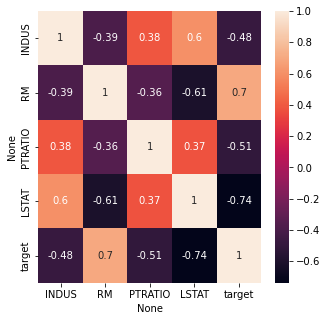

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='Density'>

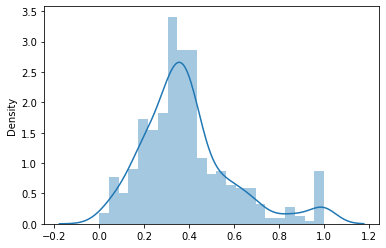

In [83]:
sns.distplot(df[['target']])

<AxesSubplot:ylabel='Density'>

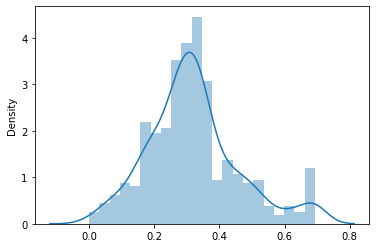

In [84]:
# 로그 변환

df['target'] = np.log1p(df.target)
sns.distplot(df.target)

In [85]:
# 로그 변환 환원

df['target'] = np.expm1(df.target)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [86]:
df_car = pd.read_csv('./dataset/mtcars.csv', index_col=0)
df_car.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [87]:
# [과제] mtcars.csv를 불러와서 0 ~ 1 스케일로 정규화한 후 qsec 컬럼이 0.5보다 큰 관측치의 개수 구하기

from sklearn.preprocessing import MinMaxScaler

def cnt_qsec(qsec):
    if qsec>0.5: return 1
    else: return 0

# mtcars.csv 파일 정보 읽기
df_car = pd.read_csv('./dataset/mtcars.csv', index_col=0)

cnt = 0

scaler = MinMaxScaler()
li_attr = ['mpg', 'cyl', "disp", "hp", 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
# 0 ~ 1 스케일 정규화

for i in li_attr:
    df_car[i] = scaler.fit_transform(df_car[[i]])
df_car['qsec_cnt']=df_car.qsec.apply(lambda x:cnt_qsec(x))
print("0~1 스케일 정규화 후 qsec 칼럼 head 출력 (mtcars.csv 파일)")
print(df_car[['qsec']].head(), '\n')
cnt = (df_car.value_counts('qsec_cnt')).to_dict()
print(f'0.5 이상의 관측치 값 갯수: {cnt[1]}\n해당되지 않는 값 갯수: {cnt[0]}')

0~1 스케일 정규화 후 qsec 칼럼 head 출력 (mtcars.csv 파일)
                       qsec
Mazda RX4          0.233333
Mazda RX4 Wag      0.300000
Datsun 710         0.489286
Hornet 4 Drive     0.588095
Hornet Sportabout  0.300000 

0.5 이상의 관측치 값 갯수: 9
해당되지 않는 값 갯수: 23


In [95]:
file_data = pd.read_csv("./dataset/mtcars.csv")
file_data=pd.DataFrame(file_data)
scaler = MinMaxScaler()
li =['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','am', 'gear', 'carb']  #스케일러 변수로 시리즈(1D)는 에러를 발생시킴

for i in li:
    file_data[i] = scaler.fit_transform(file_data[[i]])        #   fit_transform method expects 2D array

file_data.value_counts([file_data['qsec']>0.5])

qsec 
False    23
True      9
dtype: int64

In [97]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('./dataset/mtcars.csv',index_col=0)
df=pd.DataFrame(data,columns=['qsec'])
scaler = MinMaxScaler()
df['qsec_scale']=scaler.fit_transform(df)
# display(df)
df.value_counts([df['qsec_scale']>0.5])

qsec_scale
False         23
True           9
dtype: int64

In [101]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("./dataset/mtcars.csv", index_col=0)
print(df, '\n')
li = df.columns
scaler=MinMaxScaler()
scaled=scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=df.columns)
print(len(df.loc[df['qsec']>0.5, ['qsec']]))
for i in li:
    df[i]=scaler.fit_transform(df[[i]])

# scaled

                      qsec  qsec_scale
Mazda RX4            16.46    0.233333
Mazda RX4 Wag        17.02    0.300000
Datsun 710           18.61    0.489286
Hornet 4 Drive       19.44    0.588095
Hornet Sportabout    17.02    0.300000
Valiant              20.22    0.680952
Duster 360           15.84    0.159524
Merc 240D            20.00    0.654762
Merc 230             22.90    1.000000
Merc 280             18.30    0.452381
Merc 280C            18.90    0.523810
Merc 450SE           17.40    0.345238
Merc 450SL           17.60    0.369048
Merc 450SLC          18.00    0.416667
Cadillac Fleetwood   17.98    0.414286
Lincoln Continental  17.82    0.395238
Chrysler Imperial    17.42    0.347619
Fiat 128             19.47    0.591667
Honda Civic          18.52    0.478571
Toyota Corolla       19.90    0.642857
Toyota Corona        20.01    0.655952
Dodge Challenger     16.87    0.282143
AMC Javelin          17.30    0.333333
Camaro Z28           15.41    0.108333
Pontiac Firebird     17.0

In [98]:
data = pd.read_csv('./dataset/mtcars.csv',index_col =0)
print(data['qsec'].isnull().sum())      # null값이 있는지 확인
for i in list([data.columns]):          # scaler 동작을 위해 column을 모은 list를 2차원으로 변경
    scaler = MinMaxScaler()
    data[i] = scaler.fit_transform(data[i])
idx = data[data.qsec > 0.5].index
len(idx) # len을 사용해서 길이만 출력하는 방법도 가능

0


9

In [159]:
# 결합

data1 = np.arange(1, 21).reshape(4, 5)
data2 = np.arange(11, 31).reshape(5, 4)

df1 = pd.DataFrame(data1, columns=['a', 'b', 'c', 'd', 'e'])
df2 = pd.DataFrame(data2, columns=['d', 'e', 'h', 'i'])

print(df1, '\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [89]:
# 열방향 결합

con1 = pd.concat([df1, df2], axis=1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [90]:
# 행방향 결합

con2 = pd.concat([df1, df2], axis=0)
con2

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [91]:
con2 = pd.concat([df1, df2], axis=0, ignore_index=True)
con2

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [160]:
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [161]:
df2

,d,e,h,i
0,11,12,13,14
1,15,16,17,18
2,19,20,21,22
3,23,24,25,26
4,27,28,29,30


In [162]:
# 교집합

df1.join(df2, lsuffix='_a', rsuffix='_b', how='inner')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [93]:
# 합집합

df1.join(df2, lsuffix='_a', rsuffix='_b', how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [163]:
df1['ind'] = [1, 2, 3, 4]
df2['ind'] = [1, 2, 3, 4, 5]
df1.set_index('ind').join(df2.set_index('ind'), lsuffix='_a', rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [164]:
pd.merge(df1, df2, on='ind', how='inner') # 합집합 how = 'outer'

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


- concat 단순결합
- join 인덱스기준 결합
- merge 컬럼기준 결합 / 집합 연산에 용이(inner/outer)

In [120]:
# 판다스 파일 읽고 저장
# csv 파일 읽고 저장

ar1 = np.arange(10)
li1 = ar1.reshape(2, 5)
df = pd.DataFrame(li1, columns=['c0', 'c1', 'c2', 'c3', 'c4'])
df
df.to_csv('./dataset/read_csv_sample.csv', index=False)
# df.to_csv('./dataset/read_csv_sample.csv') # index=False 옵션을 넣어주지 않았을 경우 좌측에 인덱스가 추가됨

In [118]:
# df1 = pd.read_csv('./dataset/read_csv_sample.csv')
df1 = pd.read_csv('./dataset/read_csv_sample.csv', index_col=0) # 인덱스가 추가되었을 경우 삭제 방법
df1

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [121]:
# header=None 옵션(데이터셋에 헤더가 없는 경우)

df1 = pd.read_csv('./dataset/read_csv_sample.csv', header=None)
df1

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [124]:
# Json 파일 읽고 쓰기

df1.to_json('./dataset/df_j.json') # {인덱스:{키:값, 키:값...}} 형태로 저장됨
df_j = pd.read_json('./dataset/df_j.json')
df_j

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [125]:
# 바이너리 파일로 읽고 쓰기

df1.to_pickle('./dataset/df2.pkl')
df2 = pd.read_pickle('./dataset/df2.pkl')
df2

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [127]:
# 파이썬 외장함수(pickle)

import pickle

f= open('./dataset/test.txt', 'wb')
data = {1:'python', 2:'you need'}
pickle.dump(data, f)
f.close()

In [128]:
f = open('./dataset/test.txt', 'rb')
data = pickle.load(f)
print(data)
f.close()

{1: 'python', 2: 'you need'}


In [131]:
# 엑셀 파일 읽기 위해서...

!pip install openpyxl

In [132]:
# 엑셀 파일

df_ex = pd.read_excel('./dataset/auto-mpg.xlsx')
df_ex.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [133]:
df_ex.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [135]:
df_ex1 = df_ex[['mpg', 'cylinders', 'horsepower', 'weight']]
df_ex1.to_excel('./dataset/auto-mpg_ex1.xlsx', index=False)
df_ex1 = pd.read_excel('./dataset/auto-mpg_ex1.xlsx')
df_ex1.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


연산
- 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
- 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
- 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [140]:
st1 = pd.Series({'국어':100, '영어':80, '수학':90})
st2 = pd.Series({'수학':80, '국어':90, '영어':80})

add = st1+st2
sub = st1-st2
mul = st1*st2
div = round((st1/st2), 2)

print(type(add))
df = pd.concat([add, sub, mul, div], axis=1)
df

<class 'pandas.core.series.Series'>


,0,1,2,3
국어,190,10,9000,1.11
수학,170,10,7200,1.12
영어,160,0,6400,1.00


In [141]:
st1 = pd.Series({'국어':100, '영어':80, '수학':90})
st2 = pd.Series({'수학':80, '국어':90, '영어':80})

add = st1+st2
sub = st1-st2
mul = st1*st2
div = round((st1/st2), 2)

# 시리즈가 딕셔너리 형태이기 때문에 데이터프레임 제작 시 컬럼을 따로 만들어줄 필요는 없다.
result = pd.DataFrame([add, sub, mul, div], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [142]:
li = list('abcdefg')
li 

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [143]:
df1 = pd.DataFrame(np.arange(12.).reshape(3, 4), columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [144]:
df1 = pd.DataFrame(np.arange(12.).reshape(3, 4), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4, 5), columns=list('abcde'))

df2.loc[1, 'b'] = np.nan
display(df1)
display(df2)

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [145]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [146]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [155]:
# 연습문제 - sub(), mul(), div()을 사용하여 d12의 NaN 값을 0으로 대체하여 연산 수행

sub_data = df1.sub(df2, fill_value=0)
mul_data = df1.mul(df2, fill_value=0)
div_data = round(df1.div(df2, fill_value=0), 2)
print(sub_data, '\n')
print(mul_data, '\n')
print(div_data, '\n')

      a     b     c     d     e
0   0.0   0.0   0.0   0.0  -4.0
1  -1.0   5.0  -1.0  -1.0  -9.0
2  -2.0  -2.0  -2.0  -2.0 -14.0
3 -15.0 -16.0 -17.0 -18.0 -19.0 

      a     b      c      d    e
0   0.0   1.0    4.0    9.0  0.0
1  20.0   0.0   42.0   56.0  0.0
2  80.0  99.0  120.0  143.0  0.0
3   0.0   0.0    0.0    0.0  0.0 

     a     b     c     d    e
0  NaN  1.00  1.00  1.00  0.0
1  0.8   inf  0.86  0.88  0.0
2  0.8  0.82  0.83  0.85  0.0
3  0.0  0.00  0.00  0.00  0.0 



In [150]:
# reindex 경우 fill_value 지정

df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [152]:
# DataFrame과 Series간 연산

df = pd.DataFrame(np.arange(12.).reshape(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [153]:
series = df.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [154]:
df - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0
